In [157]:
from src.dataset import mfccs_dataset, OSBH_PATH
train_mfccs_ds, val_mfccs_ds, label_names, input_shape = mfccs_dataset(OSBH_PATH, 0.95, 12)

Found 900 files belonging to 2 classes.
Using 45 files for training.
Using 855 files for validation.
label names: ['noqueen' 'queen']
(TensorSpec(shape=(None, 4000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Example audio shape: (12, 4000)
Example label shape: (12,)
513 44100 16
Label: noqueen
Waveform shape: (4000,)
MFCCs shape: (12, 16)
Spectrogram shape: (118, 129, 1)
513 44100 16
Label: queen
Waveform shape: (4000,)
MFCCs shape: (12, 16)
Spectrogram shape: (118, 129, 1)

===== MFCCs (num_spectrogram_bins, sample_rate, num_mfccs) ====
513 44100 12
513 44100 12

Before balancing
Queen: 38% (17), Noqueen: 62% (28)

After balancing
Queen: 50% (17), Noqueen: 50% (17)

 ==== MFCCs input shape ==== 
(12, 12, 1)


Epoch 1/100


/Users/oleks/miniconda3/envs/tf/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


      1/Unknown 0s 430ms/step - accuracy: 0.3750 - loss: 0.9333

/Users/oleks/miniconda3/envs/tf/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.4159 - loss: 0.9064 - val_accuracy: 0.4854 - val_loss: 0.8714
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4403 - loss: 1.0689 - val_accuracy: 0.5719 - val_loss: 0.7199
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5078 - loss: 0.7636 - val_accuracy: 0.5661 - val_loss: 0.6788
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4853 - loss: 0.7129 - val_accuracy: 0.6164 - val_loss: 0.6716
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4678 - loss: 0.7495 - val_accuracy: 0.6234 - val_loss: 0.6728
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6213 - loss: 0.6884 - val_accuracy: 0.6351 - val_loss: 0.6566
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6673 - loss: 0.6505 - val_accuracy: 0.6222 - val_loss: 0.6328
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4688 - loss: 0.7160 - val_accuracy: 0.6269 - val_loss: 0.6225
Epo

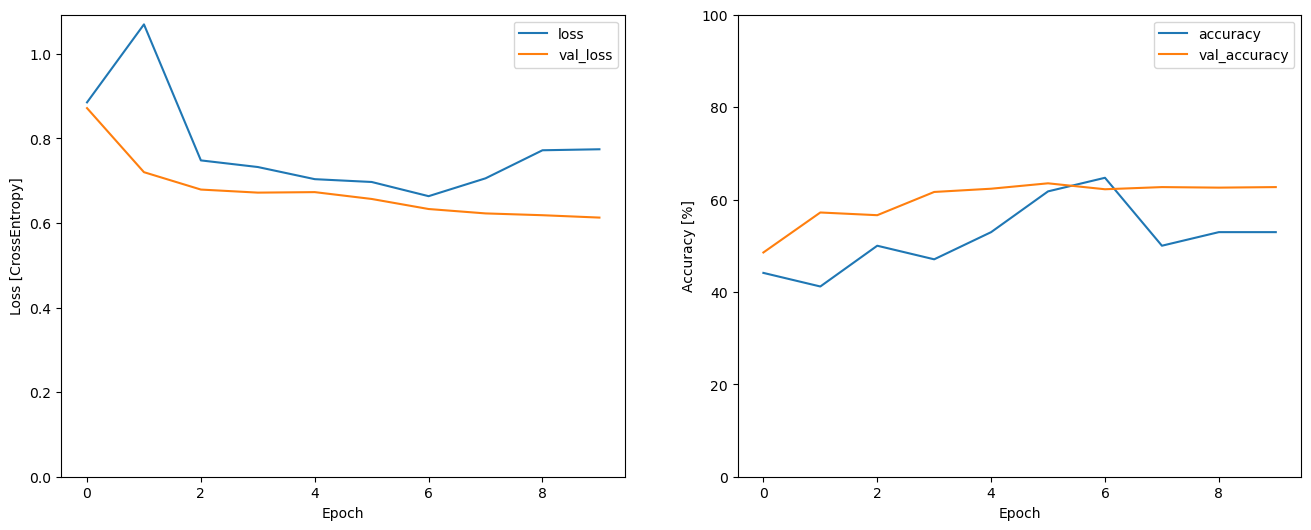

In [158]:
import tensorflow as tf

from src.model import get_conv_model_mini, callbacks
from src.plots import plot_history

LEARNING_RATE = 0.001

model = get_conv_model_mini(input_shape, len(label_names))
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history = model.fit(
    train_mfccs_ds,
    validation_data=val_mfccs_ds,
    epochs=100,
    callbacks=callbacks
)
plot_history(history)

In [159]:
def history_to_summary(prefix: str, history):
    print(f"{prefix}:    Loss: {history.history['loss'][-1]:.2f}, Acc: {history.history['accuracy'][-1]:.2f}, Val. Loss: {history.history['val_loss'][-1]:.2f}, Val. Acc: {history.history['val_accuracy'][-1]:.2f}" )

history_to_summary("OSBH + MFCCs + Conv mini model       ", history)
model.save('models/osbh_mfcc_conv_mini.keras')

OSBH + MFCCs + Conv mini model       :    Loss: 0.77, Acc: 0.53, Val. Loss: 0.61, Val. Acc: 0.63


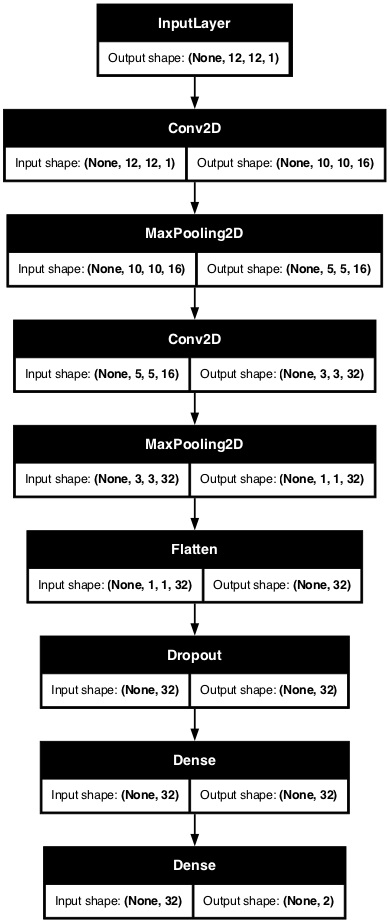

In [160]:
tf.keras.utils.plot_model(model, to_file='models/osbh_stft_conv.png', show_shapes=True, dpi=64)